<a href="https://colab.research.google.com/github/jeanlamarre16/datascience/blob/main/TP2_prepa_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import des librairies ##

In [74]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression

# Importation de la librairie drive ( google drive )
from google.colab import drive

from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import LabelEncoder


## 1. Lecture des données ##

In [2]:
# Montage du dossier google drive pour la récupération du fichier passagers.csv
drive.mount('/content/drive/')

Mounted at /content/drive/


1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [3]:
# Chargement des données du fichier de data test.csv pour le dataframe df_train
df_train = pd.read_csv('/content/drive/MyDrive/Data/passagers.csv')

In [ ]:
# Affichage des 10 premières lignes du dataframe df_train
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [4]:
# Chargement des données du fichier de data test.csv pour le dataframe df_test
df_test = pd.read_csv('/content/drive/MyDrive/Data/test.csv')

1.3 Afficher les informations des deux DataFrames train et Test.

In [5]:
# Affichage des informations du dataframe df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Affichage des informations du dataframe df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.4 Calculer le taux global de survie

In [10]:
taux_survie = round(df_train['Survived'].mean() * 100, 2)
print(f"Le taux global de survie est de : {taux_survie:.2f}%")

Le taux global de survie est de : 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?




#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?




#### Question 3 : Quel est le rôle de ces deux sets de données ?




## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [17]:
taux_survie_par_classe = df_train.groupby('Pclass')['Survived'].mean() * 100
print("Taux de survie par classe :")
# Affichage du taux de survie  de chaque classe en pourcentage % (avec 2 décimal)
for pclass, rate in taux_survie_par_classe.items():
    print(f"Classe {pclass}: {rate:.2f}%")

Taux de survie par classe :
Classe 1: 62.96%
Classe 2: 47.28%
Classe 3: 24.24%


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [21]:
taux_survie_par_sexe = df_train.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Taux de survie par genre et par classe :")
for (sex, pclass), rate in taux_survie_par_sexe.items():
    print(f"Genre: {sex}, Classe: {pclass}: {rate:.2f}%")

Taux de survie par genre et par classe :
Genre: female, Classe: 1: 96.81%
Genre: female, Classe: 2: 92.11%
Genre: female, Classe: 3: 50.00%
Genre: male, Classe: 1: 36.89%
Genre: male, Classe: 2: 15.74%
Genre: male, Classe: 3: 13.54%


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [46]:
# Calcul de la taille de la famille en prenant en compte les informations de la description des données
def calculate_family_size(row):
    return row['SibSp'] + row['Parch'] + 1

# Ajout de la nouvelle colonne familySize dans le dataframe df_train et df_test
df_test['FamilySize'] = df_test.apply(calculate_family_size, axis=1)
df_train['FamilySize'] = df_train.apply(calculate_family_size, axis=1)

# Affichage de 10 exemples pour chaque dataframe (df_train et df_test)
print("Exemple du dataframe df_train : ")
print(df_train.sample(10))
print("\n ============================== \n ")
print("Exemple du dataframe df_test : ")
print(df_test.sample(10))


Exemple du dataframe df_train : 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            Mc

2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

In [50]:
# Calcul du nombre de personnes par taille de famille
total_par_taille_famille = df_train['FamilySize'].value_counts().sort_index()

# Calcul du taux de survie par taille de famille
taux_de_survie = df_train.groupby('FamilySize')['Survived'].mean() * 100

# Création d'un DataFrame pour l'affichage
df_famille = pd.DataFrame({
    'Nombre de personnes': total_par_taille_famille,
    'Taux de survie (%)': taux_de_survie
})

# Affichage
print(df_famille)

            Nombre de personnes  Taux de survie (%)
FamilySize                                         
1                           537           30.353818
2                           161           55.279503
3                           102           57.843137
4                            29           72.413793
5                            15           20.000000
6                            22           13.636364
7                            12           33.333333
8                             6            0.000000
11                            7            0.000000


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [56]:
# Fonction de calcul de la nouvelle colonne "isAlone"
def create_family_status(df):
    df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)
    return df
# Ajout de la nouvelle nouvelle colonne isAlone au dataframe df_test et df_train
df_train = create_family_status(df_train)
df_test = create_family_status(df_test)
#Affichage 10 exemples pour le dataframe df_train
print("Exemples avec IsAlone:")
for index, row in df_train.head(10).iterrows():
    print(f"ID: {row['PassengerId']} | NOM: {row['Name']} | AGE: {row['Age']} | SEXE: {row['Sex']} | ISALONE: {row['IsAlone']}")

Exemples avec IsAlone:
ID: 1 | NOM: Braund, Mr. Owen Harris | AGE: 22.0 | SEXE: male | ISALONE: 0
ID: 2 | NOM: Cumings, Mrs. John Bradley (Florence Briggs Thayer) | AGE: 38.0 | SEXE: female | ISALONE: 0
ID: 3 | NOM: Heikkinen, Miss. Laina | AGE: 26.0 | SEXE: female | ISALONE: 1
ID: 4 | NOM: Futrelle, Mrs. Jacques Heath (Lily May Peel) | AGE: 35.0 | SEXE: female | ISALONE: 0
ID: 5 | NOM: Allen, Mr. William Henry | AGE: 35.0 | SEXE: male | ISALONE: 1
ID: 6 | NOM: Moran, Mr. James | AGE: nan | SEXE: male | ISALONE: 1
ID: 7 | NOM: McCarthy, Mr. Timothy J | AGE: 54.0 | SEXE: male | ISALONE: 1
ID: 8 | NOM: Palsson, Master. Gosta Leonard | AGE: 2.0 | SEXE: male | ISALONE: 0
ID: 9 | NOM: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) | AGE: 27.0 | SEXE: female | ISALONE: 0
ID: 10 | NOM: Nasser, Mrs. Nicholas (Adele Achem) | AGE: 14.0 | SEXE: female | ISALONE: 0


2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

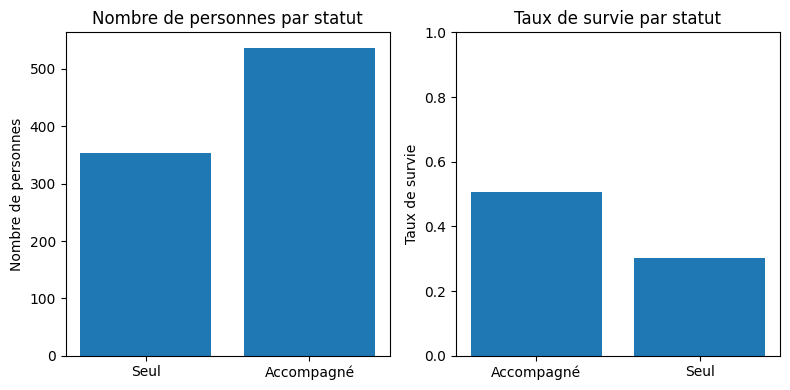

In [65]:
def visualize_survival_by_status(df):
    is_alone_counts = df['IsAlone'].value_counts()
    taux_survie = df.groupby('IsAlone')['Survived'].mean()

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Nombre de personnes
    axes[0].bar(is_alone_counts.index, is_alone_counts.values, tick_label=['Accompagné', 'Seul'])
    axes[0].set_title('Nombre de personnes par statut')
    axes[0].set_ylabel('Nombre de personnes')

    # Taux de survie
    axes[1].bar(taux_survie.index, taux_survie.values, tick_label=['Accompagné', 'Seul'])
    axes[1].set_title('Taux de survie par statut')
    axes[1].set_ylabel('Taux de survie')
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

visualize_survival_by_status(df_train)

2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [75]:
def calculate_mutual_information(df):
    # Discrétiser les variables continues
    df['Age_binned'] = pd.cut(df['Age'], bins=10, labels=False, include_lowest=True)
    df['Fare_binned'] = pd.cut(df['Fare'], bins=10, labels=False, include_lowest=True)

    # Encodage des variables catégorielles
    label_encoder = LabelEncoder()
    df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'].astype(str))

    features = ['Pclass', 'Sex_encoded', 'SibSp', 'Parch', 'IsAlone', 'Age_binned', 'Fare_binned', 'Embarked_encoded']
    mi_scores = {}
    for feature in features:
        if df[feature].isnull().any():
            df[feature] = df[feature].fillna(df[feature].mode()[0])  # Remplir les NaN par la valeur la plus fréquente
        mi = mutual_info_score(df[feature], df['Survived'])
        mi_scores[feature] = mi
    return mi_scores

mi_scores = calculate_mutual_information(df_train)
print("\nScores d'information mutuelle:")
print(mi_scores)


Scores d'information mutuelle:
{'Pclass': 0.05810725269032263, 'Sex_encoded': 0.15087048925218183, 'SibSp': 0.02319708627963908, 'Parch': 0.016365584523616174, 'IsAlone': 0.020592637551491433, 'Age_binned': 0.019822585419267645, 'Fare_binned': 0.043484118791879654, 'Embarked_encoded': 0.016668173124891522}


2.8 Afficher dans un graphique les scores d'information mutuelle par feature

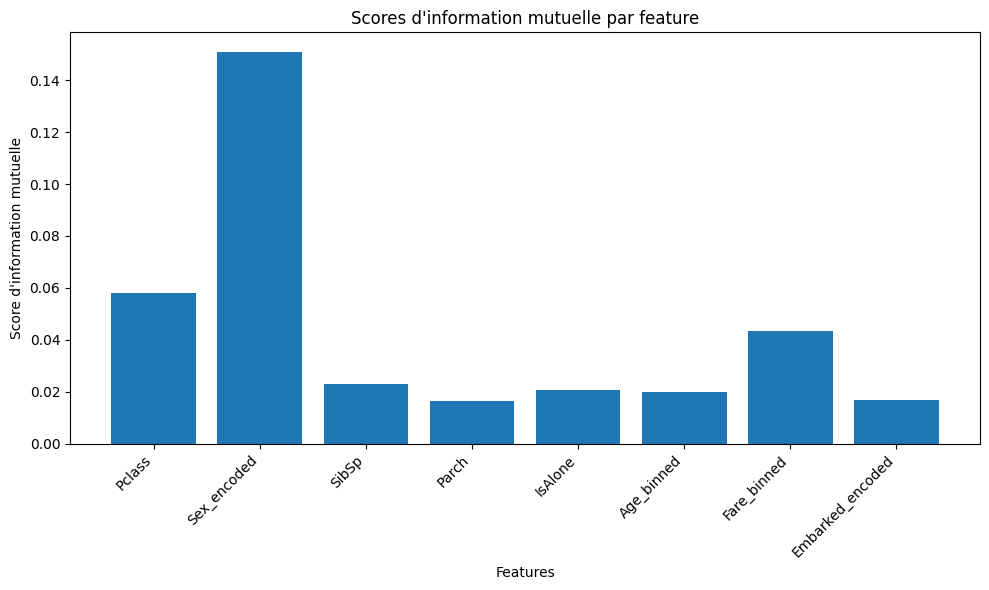

In [76]:
def plot_mutual_information(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.bar(mi_scores.keys(), mi_scores.values())
    plt.title('Scores d\'information mutuelle par feature')
    plt.xlabel('Features')
    plt.ylabel('Score d\'information mutuelle')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_mutual_information(mi_scores)

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?



### Question 2 : Même question pour la variable Sex


### Question 3 : Comment traiter le variables liées à la famille du passager ?





Question 1: La variable Classe est-elle utile pour prévoir la survie ?"
**Réponse**
Oui, la variable 'Pclass' est utile car elle a un score d'information mutuelle non nul, indiquant une relation avec la survie."

Question 2: Même question pour la variable Sex"
**Réponse**
La variable 'Sex' est utile car elle a un score d'information mutuelle non nul, indiquant une relation avec la survie."

Question 3: Comment traiter les variables liées à la famille du passager ?
**Réponse**
On peut combiner 'SibSp' et 'Parch' pour créer une nouvelle variable 'IsAlone' qui indique si le passager voyage seul ou non. On peut aussi utiliser le nombre total de membres de la famille.

## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [77]:
def fill_embarked_na(df):
    most_frequent_embarked = df['Embarked'].mode()[0]
    df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)
    return df

df_train = fill_embarked_na(df_train)
df_test = fill_embarked_na(df_test)

3.2 Afficher l'influence du port d'embarquement sur la Survie

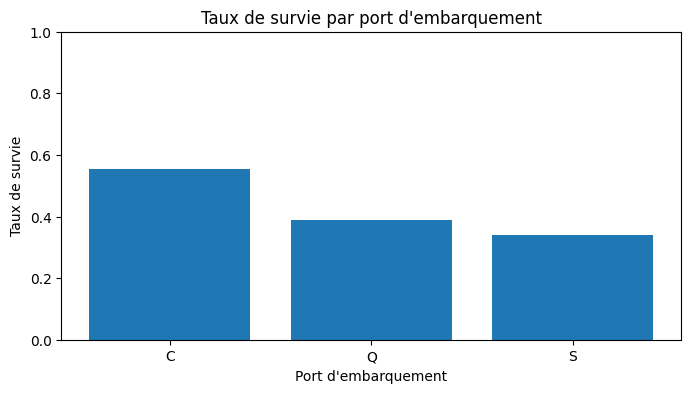

In [82]:
def plot_survival_by_embarked(df):
    survival_rates = df.groupby('Embarked')['Survived'].mean()
    plt.figure(figsize=(8, 4))
    plt.bar(survival_rates.index, survival_rates.values)
    plt.title('Taux de survie par port d\'embarquement')
    plt.xlabel('Port d\'embarquement')
    plt.ylabel('Taux de survie')
    plt.ylim(0, 1)
    plt.show()

plot_survival_by_embarked(df_train)

3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [83]:
def fill_fare_na(df):
    median_fare = df['Fare'].median()
    df['Fare'] = df['Fare'].fillna(median_fare)
    return df

df_train = fill_fare_na(df_train)
df_test = fill_fare_na(df_test)

3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [84]:
def create_categorical_fare(df):
    df['CategoricalFare'] = pd.qcut(df['Fare'], 4, labels=False)
    return df

df_train = create_categorical_fare(df_train)
df_test = create_categorical_fare(df_test)

3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

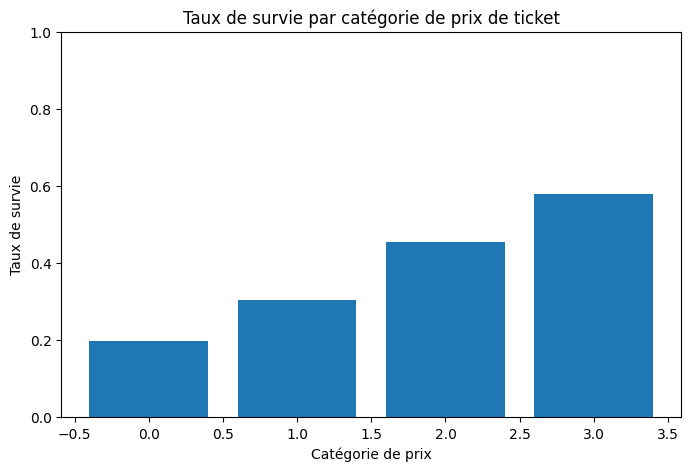

In [87]:
def plot_survival_by_categorical_fare(df):
    survival_rates = df.groupby('CategoricalFare')['Survived'].mean()
    plt.figure(figsize=(8, 5))
    plt.bar(survival_rates.index, survival_rates.values)
    plt.title('Taux de survie par catégorie de prix de ticket')
    plt.xlabel('Catégorie de prix')
    plt.ylabel('Taux de survie')
    plt.ylim(0, 1)
    plt.show()

plot_survival_by_categorical_fare(df_train)

3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

3.8 Analyser l'effet de ces catégories de prix de ticket sur la survie.

### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)